In [1]:
import json
from sklearn.datasets import fetch_20newsgroups

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train',
remove=('headers', 'footers', 'quotes'),
categories=categories)

In [4]:
newsgroups_test = fetch_20newsgroups(
    subset='test',
    remove=('headers', 'footers', 'quotes'),
    categories=categories
)

In [5]:
newsgroups_train.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [6]:
newsgroups_train.target

array([1, 3, 2, ..., 1, 0, 1], dtype=int64)

In [7]:
len(newsgroups_train.data)

2034

In [8]:
from nltk.corpus import stopwords

In [9]:
cachedStopWords = stopwords.words("english")

In [10]:
cachedStopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
X_train = newsgroups_train.data
y_train = newsgroups_train.target

In [12]:
X_test = newsgroups_test.data
y_test = newsgroups_test.target

In [13]:
from nltk.tokenize import RegexpTokenizer

In [14]:
RegTok = RegexpTokenizer("[\w']{3,}")
english_stops = set(cachedStopWords)
english_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
from nltk.stem.porter import PorterStemmer

In [16]:
def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    features = list(map(lambda token: PorterStemmer().stem(token), words))
    return features

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train)
X_train_tfidf

<2034x20085 sparse matrix of type '<class 'numpy.float64'>'
	with 133319 stored elements in Compressed Sparse Row format>

In [19]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
X_test_tfidf = tfidf.transform(X_test)
X_test_tfidf

<1353x20085 sparse matrix of type '<class 'numpy.float64'>'
	with 86961 stored elements in Compressed Sparse Row format>

In [21]:
X_test_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LR_clf = LogisticRegression()

In [24]:
LR_clf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [25]:
LR_clf.score(X_train_tfidf, y_train)

0.9616519174041298

In [26]:
LR_clf.score(X_test_tfidf, y_test)

0.7605321507760532

In [27]:
#138p

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2000, random_state=7)

In [30]:
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

In [31]:
X_train_pca.shape

(2034, 2000)

In [32]:
X_test_pca.shape

(1353, 2000)

In [33]:
pca.explained_variance_ratio_

array([8.61800229e-03, 5.90022378e-03, 5.36769541e-03, ...,
       5.04719177e-35, 4.30496364e-35, 3.58379128e-35])

In [34]:
pca.explained_variance_ratio_.sum()

1.0

In [35]:
LR_clf.fit(X_train_pca, y_train)

LogisticRegression()

In [36]:
LR_clf.score(X_train_pca, y_train)

0.9616519174041298

In [37]:
LR_clf.score(X_test_pca, y_test)

0.7605321507760532

In [38]:
#139

In [39]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1)

In [40]:
lasso_clf.fit(X_train_tfidf, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [41]:
lasso_clf.score(X_train_tfidf, y_train)

0.7900688298918387

In [42]:
lasso_clf.score(X_test_tfidf, y_test)

0.7184035476718403

In [43]:
import numpy as np

In [44]:
np.sum(lasso_clf.coef_ != 0)

321

In [45]:
pca = PCA(n_components=321, random_state=7)

In [46]:
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

In [47]:
X_train_pca.shape

(2034, 321)

In [48]:
X_test_pca.shape

(1353, 321)

In [49]:
pca.explained_variance_ratio_.sum()

0.43713822276498226

In [50]:
LR_clf = LogisticRegression()

In [51]:
LR_clf.fit(X_train_pca, y_train)

LogisticRegression()

In [52]:
LR_clf.score(X_train_pca, y_train)

0.8746312684365781

In [53]:
LR_clf.score(X_test_pca, y_test)

0.7509238728750924

In [54]:
# 140 page

In [55]:
pca = PCA(n_components=100, random_state=7)

In [56]:
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

In [57]:
pca.explained_variance_ratio_.sum()

0.2107984947279019

In [58]:
LR_clf.fit(X_train_pca, y_train)

LogisticRegression()

In [59]:
LR_clf.score(X_train_pca, y_train)

0.8072763028515241

In [60]:
LR_clf.score(X_test_pca, y_test)

0.738359201773836

In [61]:
# LSA

In [62]:
#143

In [63]:
from sklearn.decomposition import TruncatedSVD

In [64]:
svd = TruncatedSVD(n_components=2000, random_state=7)

In [65]:
svd

TruncatedSVD(n_components=2000, random_state=7)

In [66]:
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

In [67]:
X_train_lsa.shape

(2034, 2000)

In [68]:
X_test_lsa.shape

(1353, 2000)

In [69]:
svd.explained_variance_ratio_.sum()

1.0

In [70]:
LR_clf.fit(X_train_lsa, y_train)

LogisticRegression()

In [71]:
LR_clf.score(X_train_lsa, y_train)

0.9616519174041298

In [72]:
LR_clf.score(X_test_lsa, y_test)

0.7605321507760532

In [73]:
#144 잠재의미분석 100개 축소

In [74]:
svd = TruncatedSVD(n_components=100, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)
print(svd.explained_variance_ratio_.sum())
LR_clf.fit(X_train_lsa, y_train)
print(LR_clf.score(X_train_lsa, y_train))
print(LR_clf.score(X_test_lsa, y_test))

0.2086660366146553
0.8102261553588987
0.7450110864745011


In [75]:
#145p lsa 이용 문서 간 유사도 계산

In [76]:
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
newsgroups_train.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [78]:
y_train[0]

1

In [79]:
sim_result = cosine_similarity([X_train_lsa[0]], X_train_lsa)
sim_result

array([[1.        , 0.03997949, 0.0188936 , ..., 0.18398695, 0.01109302,
        0.        ]])

In [80]:
type(sim_result[0])

numpy.ndarray

In [81]:
sim_result[0].round(2)

array([1.  , 0.04, 0.02, ..., 0.18, 0.01, 0.  ])

In [82]:
sorted(sim_result[0].round(2), reverse=True)[:10]

[1.0, 0.74, 0.74, 0.72, 0.7, 0.7, 0.69, 0.67, 0.66, 0.65]

In [83]:
sim_result[0]

array([1.        , 0.03997949, 0.0188936 , ..., 0.18398695, 0.01109302,
       0.        ])

In [84]:
-sim_result[0]

array([-1.        , -0.03997949, -0.0188936 , ..., -0.18398695,
       -0.01109302, -0.        ])

In [85]:
-sim_result[0].argsort()

array([ -133, -1243,   -12, ..., -1674, -1957,     0], dtype=int64)

In [86]:
(-sim_result[0])

array([-1.        , -0.03997949, -0.0188936 , ..., -0.18398695,
       -0.01109302, -0.        ])

In [87]:
(-sim_result[0]).argsort()

array([   0, 1957, 1674, ...,   12, 1243,  133], dtype=int64)

In [88]:
sim_index = (-sim_result[0]).argsort()[:10]
sim_index

array([   0, 1957, 1674,  501, 1995, 1490,  790, 1902, 1575, 1209],
      dtype=int64)

In [89]:
[y_train[i] for i in sim_index]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [90]:
[newsgroups_train.target_names[y_train[i]] for i in sim_index]

['comp.graphics',
 'comp.graphics',
 'comp.graphics',
 'comp.graphics',
 'comp.graphics',
 'comp.graphics',
 'comp.graphics',
 'comp.graphics',
 'comp.graphics',
 'comp.graphics']

In [91]:
# 146 ifidF로 하면 어떤가

In [92]:
sim_result = cosine_similarity(X_train_tfidf[0], X_train_tfidf)
sim_result

array([[1.        , 0.00356479, 0.        , ..., 0.02546912, 0.00976539,
        0.        ]])

In [93]:
X_train_tfidf[0]

<1x20085 sparse matrix of type '<class 'numpy.float64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [94]:
X_train_lsa[0]

array([ 1.22224900e-01,  1.39746377e-01, -1.57423309e-01, -2.46461193e-02,
       -6.76315261e-03,  1.25175316e-01,  1.53389442e-01,  1.63682256e-01,
       -8.92082203e-02,  4.42711458e-02,  5.13158390e-02, -4.64975485e-02,
        5.63647967e-02, -8.42787243e-02, -3.97329413e-02,  1.66242932e-02,
        3.89466573e-02, -1.31160688e-02, -8.70584560e-03, -2.13730289e-02,
       -8.58229287e-03,  1.93537190e-02, -3.42789565e-02, -3.10810631e-02,
       -5.72877947e-02, -2.78641147e-02,  5.70231345e-02, -2.54288286e-02,
        7.89685936e-02, -3.24719631e-02,  3.13095268e-03,  2.05738874e-03,
        3.77557558e-02, -8.39914815e-03,  6.80248400e-02,  5.60560010e-05,
        6.99739014e-02, -1.53777116e-02,  6.95543113e-03,  5.52281667e-02,
        1.44068877e-02,  6.56036296e-02, -1.54072425e-02,  1.92320502e-02,
       -2.23767293e-02, -1.82884461e-02, -6.47586412e-03, -4.07359997e-02,
       -2.75240599e-02,  2.54490749e-02, -5.67970065e-02,  1.87402792e-02,
       -2.14327970e-02,  

In [95]:
sorted(sim_result[0].round(2), reverse=True)

[1.0,
 0.3,
 0.22,
 0.21,
 0.19,
 0.19,
 0.19,
 0.17,
 0.16,
 0.16,
 0.16,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.11,
 0.11,
 0.11,
 0.11,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.05,
 0.05,

In [96]:
sim_index = (-sim_result[0]).argsort()[:10]
sim_index

array([   0, 1575, 1892, 1490,  501, 1290, 1013,  998, 1636, 1705],
      dtype=int64)

In [97]:
[y_train[i] for i in sim_index]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [98]:
#147 토픽

In [99]:
svd = TruncatedSVD(n_components=10, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

In [100]:
X_train_lsa.shape

(2034, 10)

In [101]:
X_test_lsa.shape

(1353, 10)

In [102]:
svd.explained_variance_ratio_.sum()

0.0450355815145758

In [103]:
terms = tfidf.get_feature_names_out()
terms

array(["'20'", "'27", "'30'", ..., 'zware', 'zwart', 'zyxel'],
      dtype=object)

In [104]:
svd.components_.shape

(10, 20085)

In [105]:
len(terms)

20085

In [106]:
svd.components_[0]

array([3.95072043e-04, 7.35703363e-04, 1.03296980e-03, ...,
       3.56108314e-06, 7.12216629e-06, 5.51870437e-04])

In [107]:
len(svd.components_[0])

20085

In [108]:
def get_topics(model, feature_names, n=10):
    for idx, topic in enumerate(model.components_):
        print(idx+1, [feature_names[i] for i in topic.argsort()[:-n-1:-1]])

In [109]:
get_topics(svd, terms)

1 ['would', 'one', 'god', 'think', 'use', 'peopl', 'know', 'like', 'say', 'space']
2 ['file', 'imag', 'thank', 'program', 'graphic', 'space', 'format', 'use', 'color', 'ftp']
3 ['space', 'orbit', 'nasa', 'launch', 'shuttl', 'satellit', 'year', 'moon', 'lunar', 'cost']
4 ['moral', 'object', 'system', 'valu', 'goal', 'think', 'anim', 'absolut', 'natur', 'defin']
5 ['ico', 'bobb', 'tek', 'beauchain', 'bronx', 'manhattan', 'sank', 'queen', 'vice', 'blew']
6 ['god', 'file', 'imag', 'object', 'moral', 'exist', 'space', 'format', 'system', 'color']
7 ['file', 'islam', 'imag', 'cview', 'use', 'format', 'color', 'muslim', 'religion', 'peopl']
8 ['post', 'file', 'space', 'islam', 'read', 'cview', 'format', 'articl', 'group', 'moral']
9 ['christian', 'graphic', 'imag', 'jesu', 'book', 'data', 'group', 'softwar', 'law', 'code']
10 ['exist', 'atheism', 'atheist', 'graphic', 'delet', 'post', 'god', 'one', 'group', 'newsgroup']


In [110]:
#149p

In [111]:
tfidf = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.5)

In [112]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [113]:
X_train_tfidf.shape

(2034, 1000)

In [114]:
svd = TruncatedSVD(n_components=100, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)

In [115]:
X_train_lsa.shape

(2034, 100)

In [116]:
svd.components_.shape

(100, 1000)

In [117]:
svd.singular_values_.shape

(100,)

In [118]:
svd.singular_values_

array([12.99024928,  5.08550206,  4.736259  ,  4.13912119,  3.83626047,
        3.60949021,  3.49158055,  3.43277087,  3.28437202,  3.20352217,
        3.15439783,  3.11720268,  3.07133602,  3.05618627,  3.01348331,
        2.98376499,  2.95458416,  2.94555221,  2.89641994,  2.88934897,
        2.85179776,  2.83107471,  2.82284905,  2.79625028,  2.77161204,
        2.75636914,  2.7448653 ,  2.719103  ,  2.67491726,  2.66405658,
        2.65136024,  2.63460323,  2.61721653,  2.61689242,  2.59826367,
        2.57925288,  2.56848696,  2.56097225,  2.54782903,  2.53003601,
        2.50824379,  2.50406459,  2.4945412 ,  2.48473988,  2.47921061,
        2.47131298,  2.45848917,  2.44503912,  2.43004866,  2.41240103,
        2.39805249,  2.38635173,  2.37919284,  2.37413574,  2.35827326,
        2.35795264,  2.35363901,  2.3378803 ,  2.32596349,  2.31265179,
        2.30507953,  2.29697583,  2.29312268,  2.28564945,  2.27348261,
        2.26912426,  2.25477336,  2.25063822,  2.24669823,  2.24

In [119]:
np.diag(svd.singular_values_).dot(svd.components_)

array([[ 0.08711007,  0.13536259,  0.20657465, ...,  1.26819104,
         0.12127331,  0.04912362],
       [ 0.09463711,  0.0924609 ,  0.14505065, ..., -0.69568983,
        -0.06441922,  0.07170835],
       [ 0.0506618 , -0.08587566, -0.07368785, ...,  0.67561283,
         0.04810798,  0.07914622],
       ...,
       [-0.09926485,  0.0015824 ,  0.02778213, ..., -0.04092142,
        -0.03108177, -0.00442776],
       [ 0.00183211,  0.03967254,  0.05398316, ..., -0.06812015,
        -0.00891261, -0.01131418],
       [-0.02069885, -0.1349022 , -0.08888969, ...,  0.07721648,
         0.00947348, -0.06003868]])

In [120]:
np.diag(svd.singular_values_).dot(svd.components_).shape

(100, 1000)

In [121]:
t_words = np.diag(svd.singular_values_).dot(svd.components_).T
t_words

array([[ 0.08711007,  0.09463711,  0.0506618 , ..., -0.09926485,
         0.00183211, -0.02069885],
       [ 0.13536259,  0.0924609 , -0.08587566, ...,  0.0015824 ,
         0.03967254, -0.1349022 ],
       [ 0.20657465,  0.14505065, -0.07368785, ...,  0.02778213,
         0.05398316, -0.08888969],
       ...,
       [ 1.26819104, -0.69568983,  0.67561283, ..., -0.04092142,
        -0.06812015,  0.07721648],
       [ 0.12127331, -0.06441922,  0.04810798, ..., -0.03108177,
        -0.00891261,  0.00947348],
       [ 0.04912362,  0.07170835,  0.07914622, ..., -0.00442776,
        -0.01131418, -0.06003868]])

In [122]:
t_words.shape

(1000, 100)

In [123]:
len(t_words[0])

100

In [124]:
t_words[np.where(tfidf.get_feature_names_out() == 'space')[0][0]]

array([ 9.23790538e-01,  1.16044954e+00, -7.14932330e-01,  1.74270247e+00,
        2.92788076e-01, -2.81005032e-01,  6.18394915e-01,  9.77813968e-01,
        8.57532623e-01, -3.18066922e-02,  5.69219802e-02, -1.25622563e-01,
       -4.57637488e-01, -4.28695037e-01, -1.83563320e-01, -4.64849086e-01,
       -4.47170510e-02, -8.82377609e-02,  3.52408556e-01,  4.71765415e-01,
       -1.55008175e-01, -1.70104039e-01, -1.59044262e-01,  1.15446128e-01,
       -4.00053771e-01,  3.80213519e-01,  2.71960009e-01,  2.81819907e-01,
        2.15995362e-01,  9.25286366e-02,  5.12706664e-03, -2.11818309e-01,
        9.50767276e-02, -6.91903478e-02, -2.20314468e-01, -1.67044073e-02,
       -1.74854960e-01, -1.39904743e-01, -1.37699873e-01,  9.10811519e-02,
        5.82056450e-02, -1.09023401e-01,  1.08770713e-02, -2.04214889e-01,
       -1.30902315e-01, -3.15917278e-02, -5.64039279e-02,  2.38626142e-01,
       -2.18891767e-02, -8.83351703e-02, -7.57441051e-02,  1.89123498e-01,
       -6.14792892e-02, -

In [125]:
len(t_words[np.where(tfidf.get_feature_names_out() == 'space')[0][0]])

100

In [126]:
source = t_words[np.where(tfidf.get_feature_names_out() == 'space')[0][0]]
source

array([ 9.23790538e-01,  1.16044954e+00, -7.14932330e-01,  1.74270247e+00,
        2.92788076e-01, -2.81005032e-01,  6.18394915e-01,  9.77813968e-01,
        8.57532623e-01, -3.18066922e-02,  5.69219802e-02, -1.25622563e-01,
       -4.57637488e-01, -4.28695037e-01, -1.83563320e-01, -4.64849086e-01,
       -4.47170510e-02, -8.82377609e-02,  3.52408556e-01,  4.71765415e-01,
       -1.55008175e-01, -1.70104039e-01, -1.59044262e-01,  1.15446128e-01,
       -4.00053771e-01,  3.80213519e-01,  2.71960009e-01,  2.81819907e-01,
        2.15995362e-01,  9.25286366e-02,  5.12706664e-03, -2.11818309e-01,
        9.50767276e-02, -6.91903478e-02, -2.20314468e-01, -1.67044073e-02,
       -1.74854960e-01, -1.39904743e-01, -1.37699873e-01,  9.10811519e-02,
        5.82056450e-02, -1.09023401e-01,  1.08770713e-02, -2.04214889e-01,
       -1.30902315e-01, -3.15917278e-02, -5.64039279e-02,  2.38626142e-01,
       -2.18891767e-02, -8.83351703e-02, -7.57441051e-02,  1.89123498e-01,
       -6.14792892e-02, -

In [127]:
len(source)

100

In [128]:
sim_result = cosine_similarity([source], t_words)
len(sim_result[0])

1000

In [129]:
sim_result[0]

array([ 8.66001727e-02,  1.51647939e-01,  2.54089060e-01,  1.87075445e-01,
        2.17772901e-01,  2.67740694e-01,  2.30914409e-01,  2.43851900e-01,
        3.43433100e-01,  2.93004757e-01,  1.69359820e-01,  1.03591061e-01,
        3.25371440e-01,  2.33060858e-01,  1.73347398e-01,  1.58144352e-01,
        3.52891636e-02,  2.24476246e-01,  8.83590882e-02,  1.28772901e-01,
        2.88869383e-02,  1.86572382e-01,  3.48478005e-02,  2.19203584e-01,
        3.29555350e-01,  1.98542693e-01, -6.10364986e-03,  6.70400681e-02,
        1.06277182e-01,  4.23604400e-01,  1.33797145e-01,  1.34827158e-01,
        9.33808207e-02,  5.48567985e-02,  9.76480932e-03,  2.41879231e-01,
        7.51346316e-02,  1.89420827e-01,  1.52342396e-01,  6.40601483e-03,
        4.66627139e-01,  7.82408114e-02,  1.31964529e-01,  1.38528953e-01,
        1.88807957e-01,  1.22793995e-01,  2.04636969e-03,  2.00804408e-01,
        8.73645107e-02,  3.40491722e-02,  1.87172967e-01,  5.31675103e-02,
        3.93757890e-01,  

In [130]:
sim_index = (-sim_result[0]).argsort()[:20]
sim_index

array([812, 314, 754, 829, 594, 679, 720, 650, 785, 565, 101, 435, 606,
       545, 854, 746, 669, 856, 611, 564], dtype=int64)

In [131]:
[tfidf.get_feature_names_out()[i] for i in sim_index]

['space',
 'exploration',
 'sci',
 'station',
 'office',
 'propulsion',
 'reports',
 'planetary',
 'shuttle',
 'national',
 'astro',
 'international',
 'operations',
 'missions',
 'technical',
 'satellites',
 'probes',
 'telescope',
 'orbiter',
 'nasa']

In [132]:
#151p

In [138]:
import matplotlib.pyplot as plt

In [139]:
import matplotlib as mpl

In [140]:
mpl.rcParams['axes.unicode_minus'] = False

In [141]:
from sklearn.manifold import TSNE

In [142]:
tfidf = TfidfVectorizer(tokenizer=tokenizer)

In [143]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [144]:
tsne = TSNE(n_components=2, random_state=7)

In [145]:
tsne


TSNE(random_state=7)

In [147]:
tsne_tfidf = tsne.fit_transform(X_train_tfidf)
tsne_tfidf


c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 0.43813485,  0.8458983 ],
       [-1.0134064 , -0.36026496],
       [ 0.54551864,  0.07873902],
       ...,
       [ 2.636924  , -0.6739129 ],
       [ 1.0135732 ,  0.46509594],
       [ 0.8832827 ,  0.16314991]], dtype=float32)

In [148]:
tsne_tfidf.shape

(2034, 2)

In [151]:
len(tsne_tfidf[:,0])

2034

In [152]:
len(tsne_tfidf[:,1])

2034

In [157]:
color_set = {
    0:'blue',
    1:'red',
    2:'green',
    3:'purple'
}

In [158]:
colors = []
for i in y_train:
    colors.append(color_set[i])

In [159]:
colors


['red',
 'purple',
 'green',
 'blue',
 'green',
 'blue',
 'green',
 'red',
 'green',
 'red',
 'green',
 'red',
 'red',
 'green',
 'red',
 'green',
 'blue',
 'green',
 'green',
 'purple',
 'green',
 'red',
 'purple',
 'purple',
 'red',
 'red',
 'green',
 'red',
 'green',
 'purple',
 'blue',
 'purple',
 'red',
 'red',
 'blue',
 'green',
 'blue',
 'red',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'purple',
 'purple',
 'purple',
 'red',
 'green',
 'purple',
 'green',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'green',
 'blue',
 'red',
 'red',
 'green',
 'red',
 'green',
 'blue',
 'red',
 'purple',
 'red',
 'green',
 'green',
 'red',
 'green',
 'red',
 'blue',
 'blue',
 'green',
 'red',
 'purple',
 'purple',
 'blue',
 'purple',
 'green',
 'green',
 'blue',
 'green',
 'blue',
 'purple',
 'red',
 'purple',
 'blue',
 'green',
 'blue',
 'purple',
 'blue',
 'purple',
 'green',
 'green',
 'blue',
 'blue',
 'purple',
 'green',
 'purple',
 'green',
 'gr

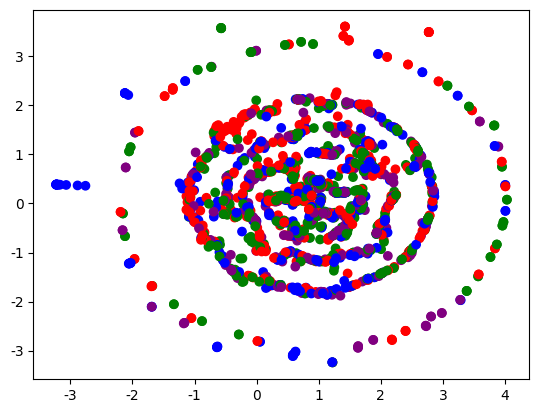

In [161]:
plt.scatter(tsne_tfidf[:,0], tsne_tfidf[:,1], color=colors)

In [162]:
#153

In [163]:
svd = TruncatedSVD(n_components=100, random_state=1)

In [164]:
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

In [165]:
svd.explained_variance_ratio_.sum()

0.2086660366146553

In [166]:
tsne_lsa = tsne.fit_transform(X_train_lsa)

c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [167]:
tsne_lsa.shape

(2034, 2)

In [168]:
tsne_lsa

array([[ 23.621807  ,  44.972595  ],
       [-35.209923  ,  12.743589  ],
       [ 15.484006  , -10.270288  ],
       ...,
       [ 14.131493  ,  19.367418  ],
       [-28.648647  , -39.39409   ],
       [  0.29817882,   4.732858  ]], dtype=float32)

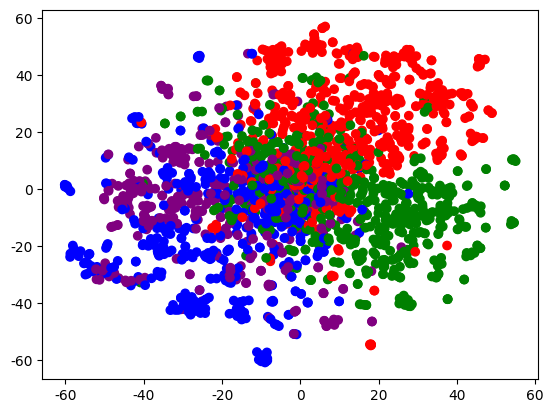

In [170]:
plt.scatter(tsne_lsa[:,0], tsne_lsa[:,1], color=colors)

In [171]:
def tsne_graph(tsne_2, label, lim=None):
    colors = {0: 'blue', 1: 'red', 2: 'green', 3: 'purple'}
    x = tsne_2[:, 0]  # 압축된 첫 차원을 x축으로 이용
    y = tsne_2[:, 1]  # 압축된 둘째 차원은 y축으로 이용
    plt.figure(figsize=(15, 10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    #for i in range(500):
    for i in range(len(x)):
        #각 값에 대해 y값 즉 label에 따라 색을 바꿔가며 text로 그래프에 출력
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color=colors[label[i]])
    plt.show()


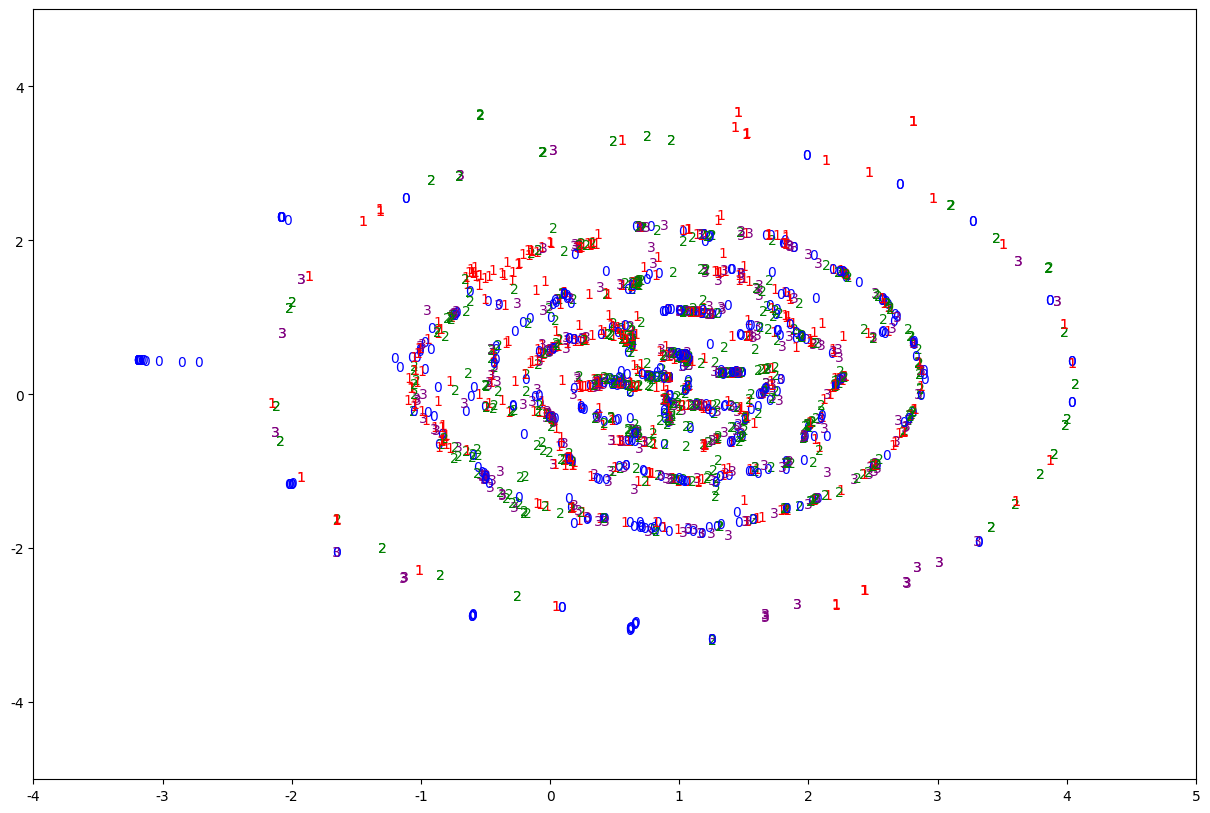

In [172]:
tsne_graph(tsne_tfidf, y_train, (-4, 5, -5, 5))


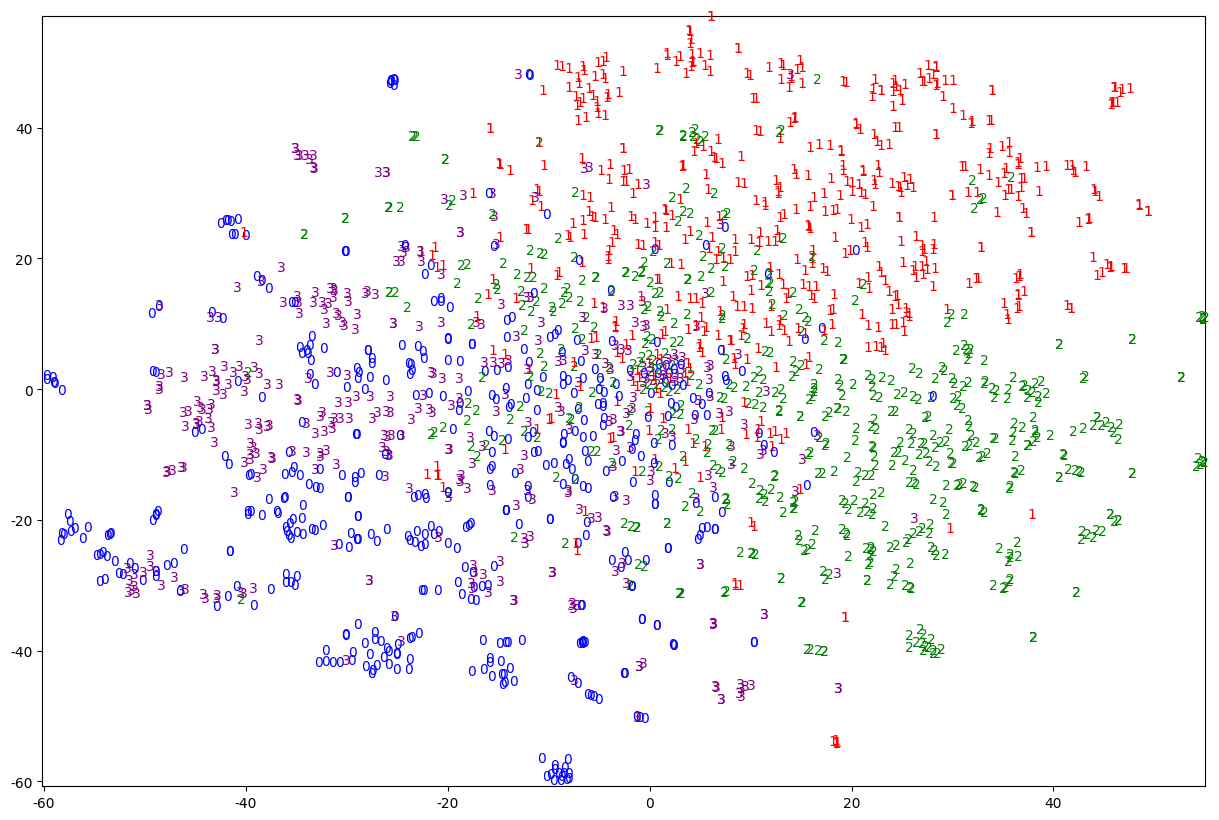

In [173]:
tsne_graph(tsne_lsa, y_train)
